In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import folium
import json

In [86]:
Data = r"C:\Users\anu10\OneDrive\Documents\Advanced Analytics and Dashboard Achievement 6"

In [87]:
country_geo = os.path.join(Data, 'us-states.json')

In [88]:
country_geo

'C:\\Users\\anu10\\OneDrive\\Documents\\Advanced Analytics and Dashboard Achievement 6\\us-states.json'

In [89]:
df = pd.read_csv(os.path.join(Data, 'recipes.csv'))

In [90]:
df.head(5)

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
df.columns[10:20]

Index(['30 days of groceries', 'advance prep required', 'alabama', 'alaska',
       'alcoholic', 'almond', 'amaretto', 'anchovy', 'anise', 'anniversary'],
      dtype='object')

In [92]:
# Load JSON data from a file
with open(country_geo, 'r') as json_file:
    data = json.load(json_file)

features = data['features']
state_names = [item['properties']['name'] for item in features]
print(state_names)

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


In [93]:
state_names = [state.lower() for state in state_names]
matching_states = list(set(df.columns) & set(state_names))
df[matching_states]

,alabama,california,virginia,connecticut,illinois,kentucky,ohio,rhode island,south carolina,vermont,...,north carolina,texas,pennsylvania,hawaii,oklahoma,nebraska,new york,michigan,alaska,georgia
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20049,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
# creating subset with required columns
state_rec = df[['title','rating','calories','protein','fat','sodium']]

In [95]:
state_rec.head()

,title,rating,calories,protein,fat,sodium
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0


In [96]:
s2 = df[matching_states].idxmax(axis=1)
state_rec['STATE_NAME'] = s2
state_rec['STATE_NAME'].str.title()

C:\Users\anu10\AppData\Local\Temp\ipykernel_19372\1417810659.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_rec['STATE_NAME'] = s2


0           Alabama
1           Alabama
2          New York
3           Alabama
4        California
            ...    
20047       Alabama
20048       Alabama
20049       Alabama
20050       Alabama
20051       Alabama
Name: STATE_NAME, Length: 20052, dtype: object

In [97]:
state_rec

,title,rating,calories,protein,fat,sodium,STATE_NAME
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,alabama
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,alabama
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,new york
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,alabama
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,california
...,...,...,...,...,...,...,...
20047,Parmesan Puffs,3.125,28.0,2.0,2.0,64.0,alabama
20048,Artichoke and Parmesan Risotto,4.375,671.0,22.0,28.0,583.0,alabama
20049,Turkey Cream Puff Pie,4.375,563.0,31.0,38.0,652.0,alabama
20050,Snapper on Angel Hair with Citrus Cream,4.375,631.0,45.0,24.0,517.0,alabama


In [98]:
# Check for missing values
state_rec.isnull().sum()

title            0
rating           0
calories      4117
protein       4162
fat           4183
sodium        4119
STATE_NAME       0
dtype: int64

<AxesSubplot:xlabel='rating', ylabel='Count'>

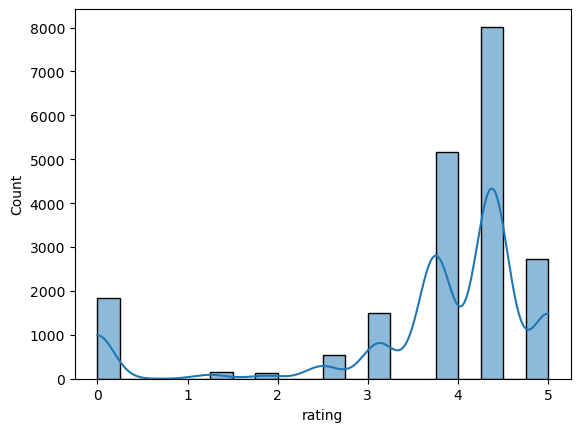

In [99]:
sns.histplot(state_rec['rating'], bins = 20,kde=True)

<AxesSubplot:xlabel='fat', ylabel='Count'>

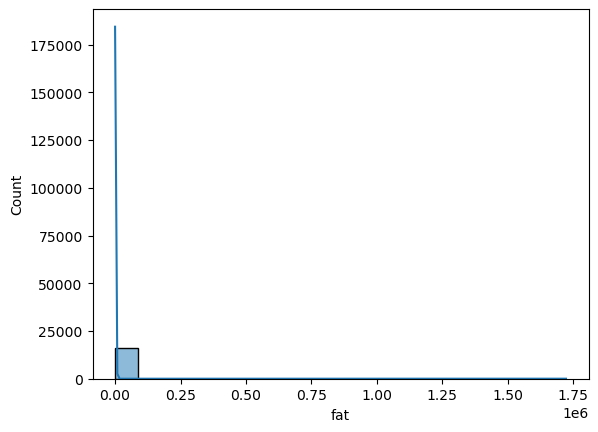

In [100]:
sns.histplot(state_rec['fat'], bins = 20,kde=True)

In [101]:
calories_per_100g = state_rec['calories']

In [102]:
calories_per_100g

0        426.0
1        403.0
2        165.0
3          NaN
4        547.0
         ...  
20047     28.0
20048    671.0
20049    563.0
20050    631.0
20051    560.0
Name: calories, Length: 20052, dtype: float64

In [103]:
state_rec.head()

,title,rating,calories,protein,fat,sodium,STATE_NAME
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,alabama
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,alabama
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,new york
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,alabama
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,california


In [111]:
# created a dataframe with required columns
data_to_plot = state_rec[['STATE_NAME','rating']]

In [105]:
data_to_plot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   STATE_NAME  20052 non-null  object 
 1   rating      20052 non-null  float64
dtypes: float64(1), object(1)
memory usage: 313.4+ KB


In [106]:
import folium

map = folium.Map(location=[40, -95], zoom_start=4)

folium.Choropleth(
    geo_data=country_geo,
    data=data_to_plot,
    columns=['STATE_NAME', 'rating'],
    key_on='feature.properties.name',
    fill_color = 'Blues', fill_opacity=.5, line_opacity=0.3,
    legend_name="Rating",
).add_to(map)

folium.LayerControl().add_to(map)

map


## 

In [110]:

# Assuming 'data_to_plot' contains a column named 'rating' with numeric values
map = folium.Map(location=[40, -95], zoom_start=4)

folium.Choropleth(
    geo_data=country_geo,
    data=data_to_plot,
    columns=['STATE_NAME', 'rating'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',  # Choose an appropriate color scale
    fill_opacity=0.5,
    line_opacity=0.3,
    legend_name="Rating",
).add_to(map)

folium.LayerControl().add_to(map)

map